## Group Shack Team Notebook

In [4]:
### In this notebook, we extract tweets from the Cape Town Freeway twitter account.
### These tweets are then processed & their features extracted.

In [7]:
# Install the necessary packages
!pip install selenium
# NB ChromeDriver needs to be downloaded & saved in the same folder as this file.
!pip install chromedriver 

!pip install tweepy
!pip install gmaps
!pip install GoogleMaps

!pip install missingno
!pip install gmplot

!pip install geopy
!pip install geocoder
!pip install HERE

    100% |████████████████████████████████| 14.3MB 723kB/s ta 0:00:011
    100% |████████████████████████████████| 92kB 1.4MB/s ta 0:00:011
  Running setup.py bdist_wheel for geographiclib ... done
  Stored in directory: /Users/Ludwe/Library/Caches/pip/wheels/99/45/d1/14954797e2a976083182c2e7da9b4e924509e59b6e5c661061
Successfully built geographiclib
    100% |████████████████████████████████| 102kB 1.4MB/s a 0:00:01


In [24]:
# General package imports:
import tweepy           
import pandas as pd     
import numpy as np      

# Selenium imports for webscraping
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.common.exceptions import NoSuchElementException, StaleElementReferenceException

#Some utilities we'll need to work with the data
from time import sleep
import json
import datetime

# For plotting and visualization:
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits import mplot3d
import matplotlib.cm as cm
%matplotlib inline

# For feature extraction & geocode processing
import nltk.corpus
import nltk.tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

# FOr geocoding
#import geocoder
#from geopy.geocoders import Nominatim
#from geopy.geocoders import here

#import chromedriver

# For processing scaped tweets
import tweepy
import json
import math
import glob
import csv
import zipfile
import zlib
from tweepy import TweepError

# Import
import sys
import time
import datetime
from urllib.request import urlopen
import configparser
import requests
from pandas.io.json import json_normalize
import codecs
from urllib.request import Request

import numpy as np
import pandas as pd
import datetime

# NLP libraries
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
import re
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
from collections import Counter, OrderedDict

# clustering
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.pairwise import cosine_similarity
from scipy.cluster.hierarchy import ward, dendrogram
import scipy.cluster.hierarchy as sch
from time import time

# for plotting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import datetime
import time
import os
import time
import pandas as pd
import numpy as np
import datashader as ds
import datashader.transfer_functions as tf
from sklearn.cluster import DBSCAN
from matplotlib.colors import Colormap

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')

### Step 1 fetch & save all tweets from the @capetownfreeway account
### Tweeted between the 1st day of 2018 & 31 July 2018.

In [ ]:
user = 'capetownfreeway'
start = datetime.datetime(2018, 1, 1)  # year, month, day
end = datetime.datetime(2018, 7, 31)  # year, month, day

driver = webdriver.Chrome()
delay = 1  

twitter_ids_filename = 'all_ids.json'
days = (end - start).days + 1

id_selector = '.time a.tweet-timestamp'
tweet_selector = 'li.js-stream-item'

user = user.lower()
ids = []

def format_day(date):
    day = '0' + str(date.day) if len(str(date.day)) == 1 else str(date.day)
    month = '0' + str(date.month) if len(str(date.month)) == 1 else str(date.month)
    year = str(date.year)
    return '-'.join([year, month, day])

def form_url(since, until):
    p1 = 'https://twitter.com/search?f=tweets&vertical=default&q=from%3A'
    p2 =  user + '%20since%3A' + since + '%20until%3A' + until + 'include%3Aretweets&src=typd'
    return p1 + p2

def increment_day(date, i):
    return date + datetime.timedelta(days=i)

In [ ]:
y=[]
for day in range(days):
    d1 = format_day(increment_day(start, 0))
    d2 = format_day(increment_day(start, 1))
    url = form_url(d1, d2)
    print(url)
    print(d1)
    driver.get(url)
    sleep(delay)
    
    try:
        found_tweets = driver.find_elements_by_css_selector(tweet_selector)
        increment = 10

        while len(found_tweets) >= increment:
            print('scrolling down to load more tweets')
            driver.execute_script('window.scrollTo(0, document.body.scrollHeight);')
            sleep(delay)
            found_tweets = driver.find_elements_by_css_selector(tweet_selector)
            increment += 10

        for tweet in found_tweets:
            try:
                id = tweet.find_element_by_css_selector(id_selector).get_attribute('href').split('/')[-1]
                ids.append(id)
            except StaleElementReferenceException as e:
                print('lost element reference', tweet)
                
        y.append(len(found_tweets))
        print('{} tweets found, {} total'.format(len(found_tweets), len(ids)))
        print(y)

    except NoSuchElementException:
        print('no tweets on this day')

    start = increment_day(start, 1)
    
try:
    with open(twitter_ids_filename) as f:
        all_ids = ids + json.load(f)
        data_to_write = list(set(all_ids))
        print('tweets found on this scrape: ', len(ids))
        print('total tweet count: ', len(data_to_write))
except FileNotFoundError:
    with open(twitter_ids_filename, 'w') as f:
        all_ids = ids
        data_to_write = list(set(all_ids))
        print('tweets found on this scrape: ', len(ids))
        print('total tweet count: ', len(data_to_write))

with open(twitter_ids_filename, 'w') as outfile:
    json.dump(data_to_write, outfile)

print('all done here')
driver.close()

In [ ]:
# Keys used for access to scrape tweets.
keys = {}
keys['consumer_key'] ='yE6FyvfrR8ozF98oeco5dhkGH'
keys['consumer_secret'] ='336k5sk0ZhUoQUGJIdZJZczdyIOqxoGl5K5jA8jO10nWBb559a'
keys['access_token'] ='472258661-lnhV4lNLJI7CXZdcxJ7SYLk4RB11nKJRwUuCZgop'
keys['access_token_secret'] ='IgBOioFf9UAhDNjMkx9IaM15zdygKtXclm57tuv9djPRS'

user = 'capetownfreeway'


auth = tweepy.OAuthHandler(keys['consumer_key'], keys['consumer_secret'])
auth.set_access_token(keys['access_token'], keys['access_token_secret'])
api = tweepy.API(auth)
user = user.lower()
output_file = '{}.json'.format(user)
output_file_short = '{}_short.json'.format(user)
compression = zipfile.ZIP_DEFLATED

with open('all_ids.json') as f:
    ids = json.load(f)

print('total ids: {}'.format(len(ids)))

all_data = []
start = 0
end = 100
limit = len(ids)
i = math.ceil(limit / 100)

for go in range(i):
    print('currently getting {} - {}'.format(start, end))
    sleep(6)  # needed to prevent hitting API rate limit
    id_batch = ids[start:end]
    start += 100
    end += 100
    tweets = api.statuses_lookup(id_batch)
    for tweet in tweets:
        all_data.append(dict(tweet._json))
        
print('metadata collection complete')
print('creating master json file')
with open(output_file, 'w') as outfile:
    json.dump(all_data, outfile)
    
print('creating ziped master json file')
zf = zipfile.ZipFile('{}.zip'.format(user), mode='w')
zf.write(output_file, compress_type=compression)
zf.close()

results = []

def is_retweet(entry):
    return 'retweeted_status' in entry.keys()

def get_source(entry):
    if '<' in entry["source"]:
        return entry["source"].split('>')[1].split('<')[0]
    else:
        return entry["source"]

with open(output_file) as json_data:
    data = json.load(json_data)
    for entry in data:
        t = {
            "created_at": entry["created_at"],
            "text": entry["text"],
            #"in_reply_to_screen_name": entry["in_reply_to_screen_name"],
            #"retweet_count": entry["retweet_count"],
            "favorite_count": entry["favorite_count"],
            "source": get_source(entry),
            "id_str": entry["id_str"],
            #"is_retweet": is_retweet(entry)
            "coordinates": entry["coordinates"] 
        }
        results.append(t)

### Finally, save the results from the tweets.

In [ ]:
dataframe = pd.DataFrame.from_dict(results)
dataframe.to_csv("2018 Tweets.csv")

### Step 2
### Extract features from the Tweets

In [ ]:
# Consumer:
CONSUMER_KEY    = 'yE6FyvfrR8ozF98oeco5dhkGH'
CONSUMER_SECRET = '336k5sk0ZhUoQUGJIdZJZczdyIOqxoGl5K5jA8jO10nWBb559a'

# Access:
ACCESS_TOKEN  = '472258661-lnhV4lNLJI7CXZdcxJ7SYLk4RB11nKJRwUuCZgop'
ACCESS_SECRET = 'IgBOioFf9UAhDNjMkx9IaM15zdygKtXclm57tuv9djPRS'

In [ ]:
tweets = dataframe.copy()

In [ ]:
def implication(tweet):
    list2 = [
        'is cleared', 'no delays', 'expect delays', 'has been cleared', 'drive carefully',
        'use alt route', 'use alternate route', 'is now cleared', 'drive care', 'cleared',
        'am peak', 'reopened', 'right lane closed', "drive carefully"
    ]

    if check_update(tweet) == 'Not Update':
        a = {}
        # check #
        for i in list2:
            if i in tweet.lower():
                return i
            #else:
            #    return 'unclassified'
        
    else:
        for i in list2:
            if i in tweet.lower():
                return 'Update - ' + i

def condition(tweet):
    list1 = ['Planned_Road_Closure','Roadworks','Crash','Stationary Vehicle', 'Misty Conditions',
             'Slow moving traffic','Stationary_vehicle',"Stationary vehicle",'Congestion','Lost_load','Vehicle Alight',
            'Slow moving Traffic','Incident','Road_Closure','Lost load',"Veldfire", 'Vehicle', 'vehicle', "Poor Visibility",
            "Animals", 'Road Closure', "Stationary Motor Car"
            ]
    if check_update(tweet) == 'Not Update':
        a = {}
        # check #
        for i in list1:
            if i in tweet:
                return i
            #else:
            #    return 'unclassified'
        
    else:
        for i in list1:
            if i in tweet:
                return 'Update - ' + i

        
def check_update(tweet):
    if tweet[:len('Update')] == 'Update':
        return 'Update'
    else:
        return 'Not Update'

In [ ]:
tweets['created_at'] = pd.to_datetime(tweets['created_at'],  infer_datetime_format=True)
tweets['Update'] = tweets.apply(lambda row: check_update(row['text']), axis=1)
tweets['Prob. Classification'] = tweets.apply(lambda row: condition(row['text']), axis=1)
tweets['Implication'] = tweets.apply(lambda row: implication(row['text']), axis=1)
tweets.head()

In [ ]:
tweets.to_csv("2018 Tweets - Extracted.csv")

### Step 3
### Infering tweet content location based on words in the tweet.

In [ ]:
data = pd.read_csv('2018 - Final.csv')

In [ ]:
data.drop(columns=["Unnamed: 0"],inplace=True)

In [ ]:
#Function used to identify an expanded list of stopwords.
def stop(stopwords):
    '''
    Description
    Add to the stopwords list each of the common traffic words
    

    params:
    
        stopwords: Common english words
        
    '''

    types = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
             'Sunday', 'January', 'February', 
         'March', 'April', 'May', 'June', 'July', 'August', 'September','October',
            'November', 'December','vehicle','congestion','roadworks','delays','delays','road',
             'closure','crash','expect','animals','lanes','stationary','incident',
            'Inbound','Outbound', 'Eastbound','I/C', 'Poor Visibility', 'Poor Visibility Veld Fore'
             'Planned_Road_Closure','Roadworks','Crash','Stationary Vehicle', 'Misty Conditions',
             'Slow moving traffic','Stationary_vehicle',"Stationary vehicle",'Congestion','Lost_load','Vehicle Alight',
            'Slow moving Traffic','Incident','Road_Closure','Lost load',"Veldfire", 'Vehicle', 'vehicle',
             "westbound", "North", "South", "Ramp", "I/C",'southbound', "PM", 'northbound','Southbound','Northbound',
            'is cleared', 'no delays', 'expect delays', 'has been cleared', 'drive carefully', "towards", "Towards"
        'use alt route', 'use alternate route', 'is now cleared', 'drive care', 'cleared', 'Animals', "Christian Barnard",
        'am peak', 'reopened', 'right lane closed', "Tunnel Inside Tunnel", "@"]
    
    stop = stopwords.words('english')
    for type in types:
        stop.append(type)

    print(stop)
    return stop
stop_rev = stop(stopwords)

In [ ]:
def location(tweet):
    '''
    Description
    Removes all the stopwords from the tweet, thereafter use parts of speech tagging(NLP Technique).
    Selecting only NNP(Proper noun, singular),NNS(Noun, plural),NNPS(Proper noun, plural) to be returned as string
    

    params:
        
        tweet: actual 140 character tweet
        
    '''# added .lower(), to make removing stopwords non case sensitive.
    words = word_tokenize(tweet)
    wordsFiltered = []

    for word in words:
        if word not in stop_rev:
            wordsFiltered.append(word) 
    joined_wordsFiltered = " ".join(wordsFiltered)
    #print(joined_wordsFiltered) 
    
    tagged = nltk.pos_tag(joined_wordsFiltered.split())
    #print(tagged)
    
    wordsFiltered_2 = []
    for word,pos in zip(joined_wordsFiltered.split(),tagged):
        #print(pos)
        if (pos[1] == 'NNP' or pos[1] == 'NNS' or pos[1] == 'NNPS'):
            wordsFiltered_2.append(word) 
    #print(wordsFiltered_2) 
    joined = " ".join(wordsFiltered_2)
    
    return joined

In [ ]:
pattern_url = r'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+'

In [ ]:
def clean_up(data):
    '''
    Description
    Selecting only the words not in stopwords, thereafter partitioning on the hashtag which means not taking anything
    after the hashtag. Without the hastag a split on ':' is done and the list with the most number of elements selected.
    Thereafter the same procedure but only split on '.' and lastly the remaining text is split on ',' and we apply the 
    function that returns proper nouns(location method) and we select the list with the most number of pronouns.
    

    params:
        params:
        data: Data frame of features
        
        feature = feature of interest
    '''
    filtered_words = [i for i in data.split() if i not in stop_rev]
    print(filtered_words)
    data_joined = " ".join(filtered_words)
    
    head, sep, tail = data_joined.partition('#')
    tweet_list = head.split(':')
    
    twee = max(tweet_list, key=len)
    tweet_list_2 = twee.split('.')
    
    twee_2 = max(tweet_list_2, key=len)

    
    tweet_list_3 = twee_2.split(',')
    
    
    check_list = []
    
    for i in range(0,len(tweet_list_3)):
        check_list.append(location(tweet_list_3[i]))
     
    print(check_list)
    print("********")
    crux = max(check_list, key=len)
    #print(crux)
    
    return crux

In [ ]:
data['New Tweets'] = data['text'].replace(to_replace = pattern_url, value = '', regex = True)
data.head()

In [ ]:
data['location'] = data.apply(lambda row: clean_up(row['New Tweets']), axis=1)
data.head()

In [ ]:
# Finally extract locations.

In [ ]:
def location_generate1(text):
    '''
    Description
    A function that gets the physical location to be processed by the geocode.
    params:
        text: Text in a dataframe
    '''
    geocode_result = gmaps.geocode(text + ', Cape Town, South Africa')
    try:
        return [geocode_result[0]['geometry']['location']['lat'],geocode_result[0]['geometry']['location']['lng']]
    except:
        pass

In [ ]:
data['coordinates'] = data['location'].apply(location_generate)
data.head()

### Step 4
### Using data manually recorded from google to visualise the flactuations of traffic in 5 different roads around Cape Town
### NB: The days on each plot start from Sunday (day 0). The time also begins at 6AM (encoded as 0) until 10pm, incrementing in 30 minute intervals.
### The axis represents traffic severerity, with 1 being free flowing & 4 being Extreme traffic.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import matplotlib.cm as cm
%matplotlib inline
import pandas as pd

In [6]:
df =pd.DataFrame.from_csv('3D Google Maps Traffic Data 2.csv')
df.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  """Entry point for launching an IPython kernel.


,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1,3,3,4,4,4,4,3,2,2,1,...,2,2,1,1,1,1,1,1,1,1
2,3,3,4,4,4,4,3,3,2,1,...,2,2,1,1,1,1,1,1,1,1
3,3,3,4,4,4,4,3,2,2,1,...,2,2,1,1,1,1,1,1,1,1
4,2,3,4,4,4,4,3,3,2,1,...,2,2,1,1,1,1,1,1,1,1


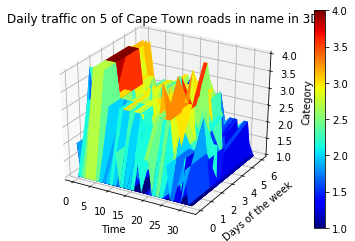

In [7]:
x = np.arange(len(df.columns))
y = df.index
X,Y = np.meshgrid(x,y)
Z = df
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# ax.plot_surface(X, Y, Z)
surf = ax.plot_surface(X, Y, Z,  cmap=cm.jet)
plt.title('Daily traffic on all 5 selected roads of Cape Town.')
ax.set_xlabel('Time')
ax.set_ylabel('Days of the week')
ax.set_zlabel('Category')
fig.colorbar(surf)
fig.savefig('3D.png')

In [8]:
list3 = [0,7,14,21,28,35,42,49,56,63]
day_dictionary = {}
#roads = ['1','2','3','4','5','6','7']

for i in list3:
    #print(df_b[i:i+7])
    day_dictionary[i] = df[i:i+7]
day_dictionary[0]

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1,3,3,4,4,4,4,3,2,2,1,...,2,2,1,1,1,1,1,1,1,1
2,3,3,4,4,4,4,3,3,2,1,...,2,2,1,1,1,1,1,1,1,1
3,3,3,4,4,4,4,3,2,2,1,...,2,2,1,1,1,1,1,1,1,1
4,2,3,4,4,4,4,3,3,2,1,...,2,2,1,1,1,1,1,1,1,1
5,2,3,3,4,4,3,3,2,1,1,...,3,2,2,1,1,1,1,1,1,1
6,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [9]:
df_N2_inbound = day_dictionary[0]
df_N2_outbound = day_dictionary[7]

df_N1_inbound = day_dictionary[14]
df_N1_outbound = day_dictionary[21]

df_M5_inbound = day_dictionary[28]
df_M5_outbound = day_dictionary[35]

df_M3_inbound = day_dictionary[42]
df_M3_outbound = day_dictionary[49]

df_Adderley_inbound = day_dictionary[56]
df_Adderley_outbound = day_dictionary[63]

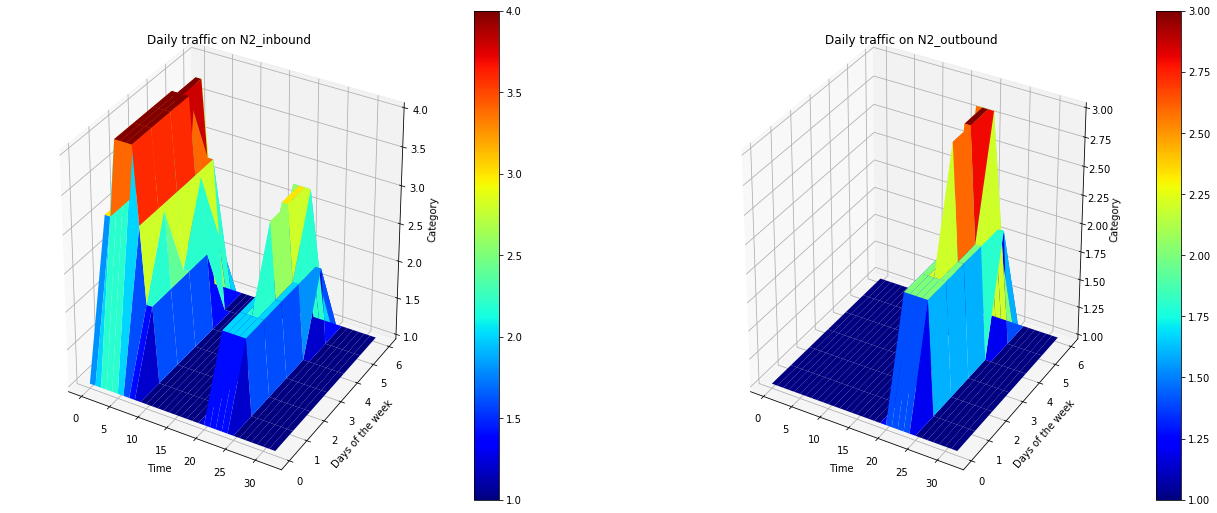

In [10]:
x1 = np.arange(len(df_N2_inbound.columns))
y1 = df_N2_inbound.index
x2 = np.arange(len(df_N2_outbound.columns))
y2 = df_N2_outbound.index
X1,Y1 = np.meshgrid(x1,y1)
X2,Y2 = np.meshgrid(x2,y2)
Z1 = df_N2_inbound
Z2 = df_N2_outbound
fig = plt.figure( figsize=(22,9))
ax = fig.add_subplot(1,2,1, projection='3d')
surf = ax.plot_surface(X1, Y1, Z1,  cmap=cm.jet)
plt.title('Daily traffic on N2_inbound')
ax.set_xlabel('Time')
ax.set_ylabel('Days of the week')
ax.set_zlabel('Category')
fig.colorbar(surf)
fig.savefig('3D.png')

#2nd plot
ax = fig.add_subplot(1, 2, 2, projection='3d')
surf = ax.plot_surface(X2, Y2, Z2, cmap=cm.jet)
plt.title('Daily traffic on N2_outbound')
ax.set_xlabel('Time')
ax.set_ylabel('Days of the week')
ax.set_zlabel('Category')
fig.subplots_adjust(wspace=0.25)
fig.colorbar(surf)

plt.show()

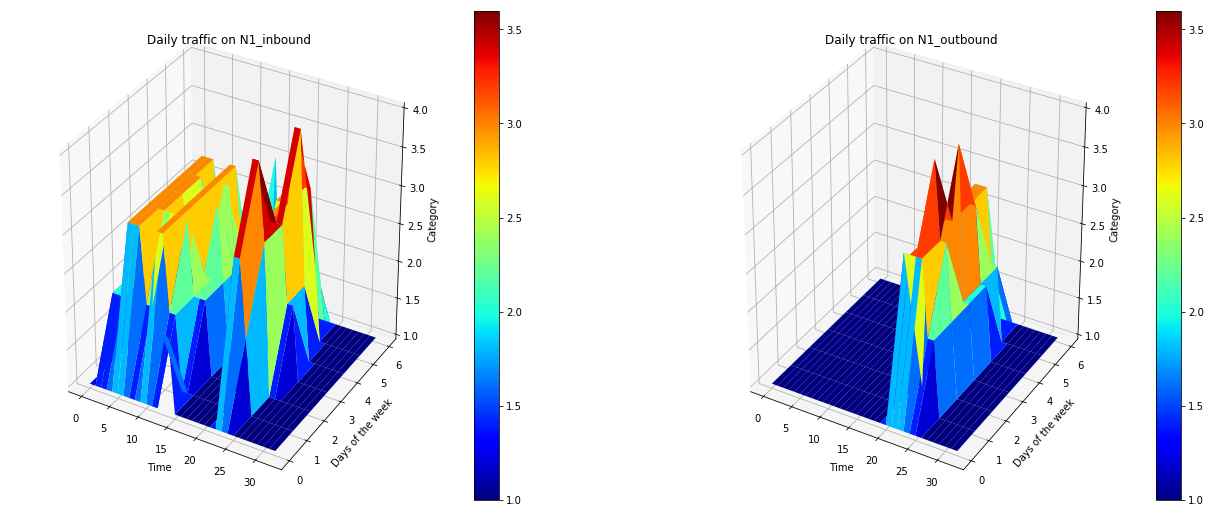

In [11]:
x1 = np.arange(len(df_N1_inbound.columns))
y1 = df_N1_inbound.index
x2 = np.arange(len(df_N2_outbound.columns))
y2 = df_N1_outbound.index
X1,Y1 = np.meshgrid(x1,y1)
X2,Y2 = np.meshgrid(x2,y2)
Z1 = df_N1_inbound
Z2 = df_N1_outbound
fig = plt.figure( figsize=(22,9))
ax = fig.add_subplot(1,2,1, projection='3d')
surf = ax.plot_surface(X1, Y1, Z1,  cmap=cm.jet)
plt.title('Daily traffic on N1_inbound')
ax.set_xlabel('Time')
ax.set_ylabel('Days of the week')
ax.set_zlabel('Category')
fig.colorbar(surf)
fig.savefig('3D.png')

#2nd plot
ax = fig.add_subplot(1, 2, 2, projection='3d')
surf = ax.plot_surface(X2, Y2, Z2, cmap=cm.jet)
plt.title('Daily traffic on N1_outbound')
ax.set_xlabel('Time')
ax.set_ylabel('Days of the week')
ax.set_zlabel('Category')
fig.subplots_adjust(wspace=0.25)
fig.colorbar(surf)

plt.show()

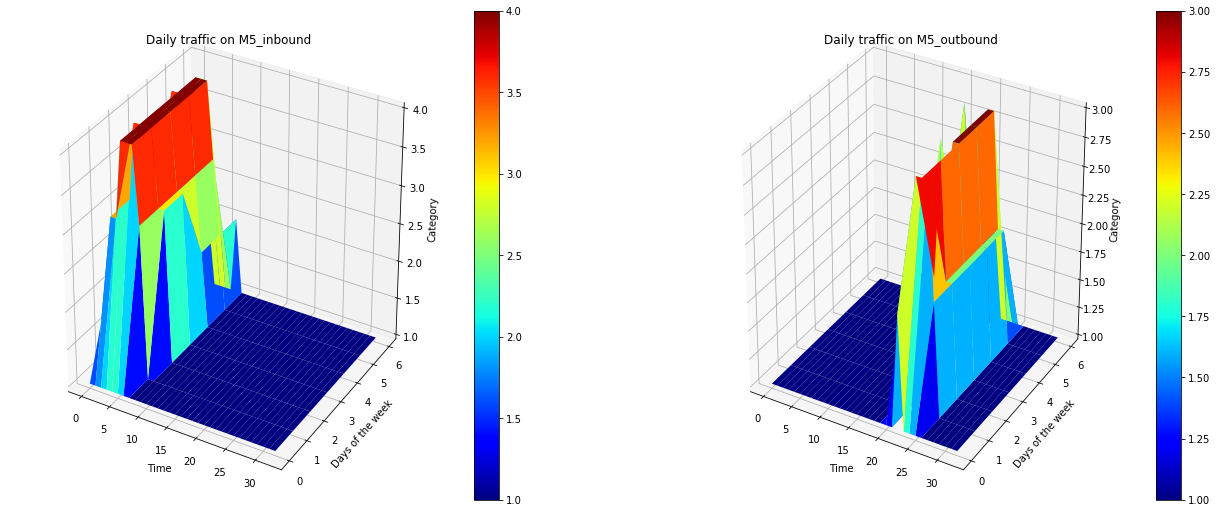

In [12]:
x1 = np.arange(len(df_M5_inbound.columns))
y1 = df_M5_inbound.index
x2 = np.arange(len(df_M5_outbound.columns))
y2 = df_M5_outbound.index
X1,Y1 = np.meshgrid(x1,y1)
X2,Y2 = np.meshgrid(x2,y2)
Z1 = df_M5_inbound
Z2 = df_M5_outbound
fig = plt.figure( figsize=(22,9))
ax = fig.add_subplot(1,2,1, projection='3d')
surf = ax.plot_surface(X1, Y1, Z1,  cmap=cm.jet)
plt.title('Daily traffic on M5_inbound')
ax.set_xlabel('Time')
ax.set_ylabel('Days of the week')
ax.set_zlabel('Category')
fig.colorbar(surf)
fig.savefig('3D.png')

#2nd plot
ax = fig.add_subplot(1, 2, 2, projection='3d')
surf = ax.plot_surface(X2, Y2, Z2, cmap=cm.jet)
plt.title('Daily traffic on M5_outbound')
ax.set_xlabel('Time')
ax.set_ylabel('Days of the week')
ax.set_zlabel('Category')
fig.subplots_adjust(wspace=0.25)
fig.colorbar(surf)

plt.show()

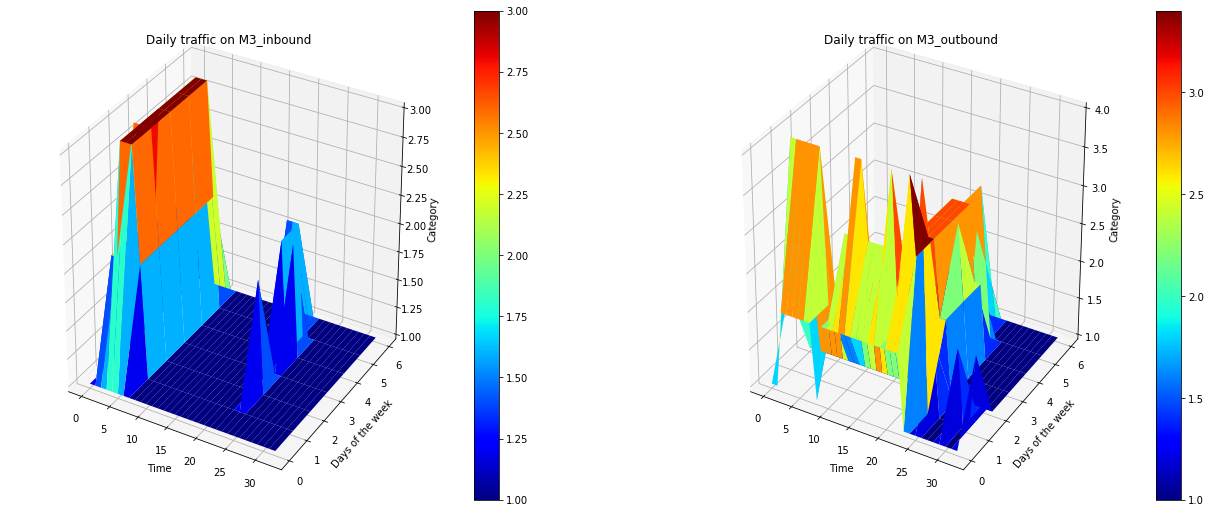

In [13]:
x1 = np.arange(len(df_M3_inbound.columns))
y1 = df_M3_inbound.index
x2 = np.arange(len(df_M3_outbound.columns))
y2 = df_M3_outbound.index
X1,Y1 = np.meshgrid(x1,y1)
X2,Y2 = np.meshgrid(x2,y2)
Z1 = df_M3_inbound
Z2 = df_M3_outbound
fig = plt.figure( figsize=(22,9))
ax = fig.add_subplot(1,2,1, projection='3d')
surf = ax.plot_surface(X1, Y1, Z1,  cmap=cm.jet)
plt.title('Daily traffic on M3_inbound')
ax.set_xlabel('Time')
ax.set_ylabel('Days of the week')
ax.set_zlabel('Category')
fig.colorbar(surf)
fig.savefig('3D.png')

#2nd plot
ax = fig.add_subplot(1, 2, 2, projection='3d')
surf = ax.plot_surface(X2, Y2, Z2, cmap=cm.jet)
plt.title('Daily traffic on M3_outbound')
ax.set_xlabel('Time')
ax.set_ylabel('Days of the week')
ax.set_zlabel('Category')
fig.subplots_adjust(wspace=0.25)

fig.colorbar(surf)
fig.savefig('3D.png')
plt.show()

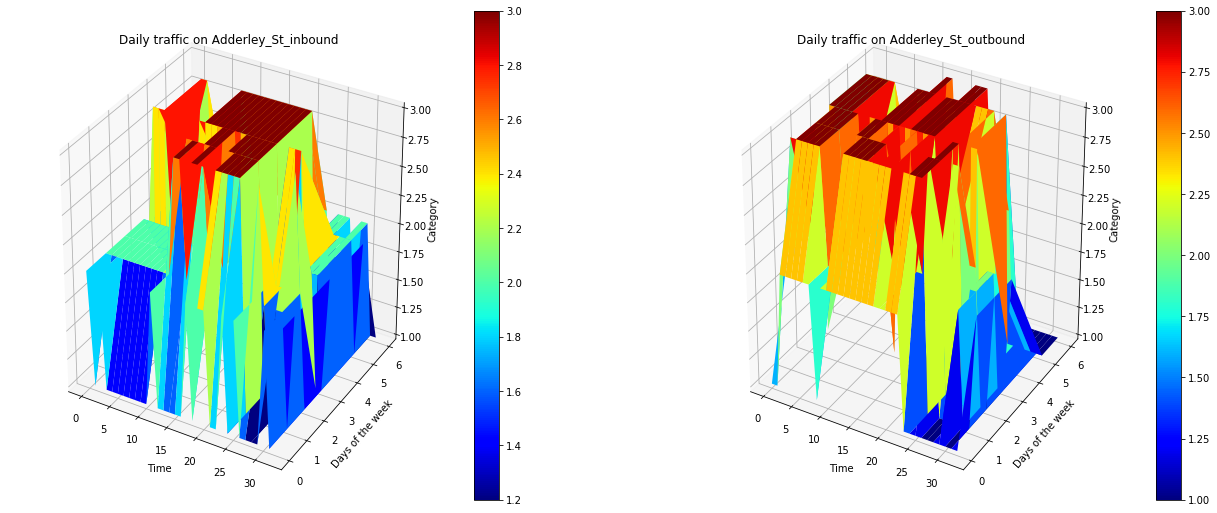

In [14]:
x1 = np.arange(len(df_Adderley_inbound.columns))
y1 = df_Adderley_inbound.index
x2 = np.arange(len(df_Adderley_outbound.columns))
y2 = df_Adderley_outbound.index
X1,Y1 = np.meshgrid(x1,y1)
X2,Y2 = np.meshgrid(x2,y2)
Z1 = df_Adderley_inbound
Z2 = df_Adderley_outbound
fig = plt.figure( figsize=(22,9))
ax = fig.add_subplot(1,2,1, projection='3d')
surf = ax.plot_surface(X1, Y1, Z1,  cmap=cm.jet)
plt.title('Daily traffic on Adderley_St_inbound')
ax.set_xlabel('Time')
ax.set_ylabel('Days of the week')
ax.set_zlabel('Category')
fig.colorbar(surf)
fig.savefig('3D.png')

#2nd plot
ax = fig.add_subplot(1, 2, 2, projection='3d')
surf = ax.plot_surface(X2, Y2, Z2,  cmap=cm.jet)
fig.colorbar(surf)
plt.title('Daily traffic on Adderley_St_outbound')
ax.set_xlabel('Time')
ax.set_ylabel('Days of the week')
ax.set_zlabel('Category')
fig.subplots_adjust(wspace=0.25)
plt.show()


## Step 5
## Use the Tom Tom Api to collect traffic data from 5 roads around Cape Town.

In [16]:
#!/usr/bin/python
# -*- coding: utf-8 -*-
# General:
import tweepy           # To consume Twitter's API
import pandas as pd     # To handle data
import numpy as np      # For numerical computation

# For plotting and visualization:



In [ ]:
temp =[]
temp2 =[]
dict1 = []
dict2 = []

def calculate_route(inboundRoute,departAt):
    '''A function to read API Urls in a loop
    to geta json response'''
    
    
    apiURL = "https://api.tomtom.com/routing/1/calculateRoute/"
    
    apiKey= "PssoYM11PZGpXkm8ZrId2DLqXepHhnDQ"
    
    #For loop to read the API Url
    for i in range(len(inboundRoute)):
        for j in range(len(departAt)):
           
            url_in = "%s/%s,%s:%s,%s/json?departAt=%s&traffic=true&avoid=unpavedRoads&key=%s" % \
            (apiURL,inboundRoute[i][0][0],inboundRoute[i][0][1]
                            ,inboundRoute[i][1][0],inboundRoute[i][1][1]
                             ,departAt[j], apiKey) 
          
            try:
                
                getdata_in = urlopen(url_in).read()
                
                
            except urllib.HTTPError as err:
                print("http error")
                continue
                    
            
            jsonString_in = json.loads(getdata_in)
            summary_in = jsonString_in['routes'][0]['summary']
            
            #Append the results to lists
            dict1.append(summary_in)
            temp.append(jsonString_in)

            #Create a list for future DataFrame column for the Route Co-ordinates
            in1 =str((inboundRoute[i][0][0], inboundRoute[i][0][1]))
            in2 = str((inboundRoute[i][1][0], inboundRoute[i][1][1]))
            inall = in1 +':'+ in2
            dict2.append(inall)
            
            #Create a Dataframe from the json response
            df = pd.DataFrame(dict1)
            df['Route'] = dict2
                
           
    df.to_csv('RoutesFINAL2.csv')
            
    return df, dict2

In [ ]:
calculate_route([((-33.950037,18.520525),(-33.944040,18.486955)) ,
                 ((-33.9426621,18.455411),(-33.921303,18.439644)),
                 ((-33.976507,18.49277),(-33.921303,18.439644)),
                 ((-33.965091,18.459148),(-33.9426621,18.455411)),
                 ((-33.924967,18.420160),(-33.920084,18.425175)),
                ((-33.944040,18.486955),(-33.950037,18.520525)),
                 ((-33.921303,18.439644),(-33.9426621,18.455411)),
                 ((-33.921303,18.439644),(-33.976507,18.49277)),
                 ((-33.9426621,18.455411),(-33.965091,18.459148)),
                 ((-33.920084,18.425175),(-33.924967,18.420160))]
                
                ,["2018-08-12T06:00:00","2018-08-12T06:30:00","2018-08-12T07:00:00","2018-08-12T07:30:00","2018-08-12T08:00:00",
                            "2018-08-12T08:30:00","2018-08-12T09:00:00","2018-08-12T09:30:00","2018-08-12T10:00:00","2018-08-12T15:00:00",
                            "2018-08-12T15:30:00","2018-08-12T16:00:00","2018-08-12T16:30:00","2018-08-12T17:00:00","2018-08-12T17:30:00",
                            "2018-08-12T18:00:00","2018-08-12T18:30:00","2018-08-12T19:00:00",
                 
                 "2018-08-13T06:00:00","2018-08-13T06:30:00","2018-08-13T07:00:00","2018-08-13T07:30:00","2018-08-13T08:00:00",
                        "2018-08-13T08:30:00","2018-08-13T09:00:00","2018-08-13T09:30:00","2018-08-13T10:00:00","2018-08-13T15:00:00",
                        "2018-08-13T15:30:00","2018-08-13T16:00:00","2018-08-13T16:30:00","2018-08-13T17:00:00","2018-08-13T17:30:00",
                        "2018-08-13T18:00:00","2018-08-13T18:30:00","2018-08-13T19:00:00",
                 
                 "2018-08-15T06:00:00","2018-08-15T06:30:00","2018-08-15T07:00:00","2018-08-15T07:30:00","2018-08-15T08:00:00",
                        "2018-08-15T08:30:00","2018-08-15T09:00:00","2018-08-15T09:30:00","2018-08-15T10:00:00","2018-08-15T15:00:00",
                        "2018-08-15T15:30:00","2018-08-15T16:00:00","2018-08-15T16:30:00","2018-08-15T17:00:00","2018-08-15T17:30:00",
                        "2018-08-15T18:00:00","2018-08-15T18:30:00","2018-08-15T19:00:00",
                  
                  "2018-08-17T06:00:00","2018-08-17T06:30:00","2018-08-17T07:00:00","2018-08-17T07:30:00","2018-08-17T08:00:00",
                        "2018-08-17T08:30:00","2018-08-17T09:00:00","2018-08-17T09:30:00","2018-08-17T10:00:00","2018-08-17T15:00:00",
                        "2018-08-17T15:30:00","2018-08-17T16:00:00","2018-08-17T16:30:00","2018-08-17T17:00:00","2018-08-17T17:30:00",
                        "2018-08-17T18:00:00","2018-08-17T18:30:00","2018-08-17T19:00:00"])
            

In [ ]:
routes = pd.read_csv('RoutesFINAL2.csv')


In [ ]:
routes.drop('Unnamed: 0', axis=1)
routes['depature_time'] = routes['departureTime'].astype(str).str[11:19]
routes['date'] = routes['departureTime'].astype(str).str[:10]

def days_(routes):
    if routes == "2018-08-12":
        return "Sunday"
    elif routes == "2018-08-13":
        return "Monday"
    elif routes == "2018-08-15":
        return  "Wednesday"
    elif routes == "2018-08-17":
        return  "Friday"
routes['day'] = routes['date'].apply(days_)

In [ ]:
def route_name(routes):
    
    if routes == "(-33.950037, 18.520525):(-33.94404, 18.486955)":
        return "N2 Settlers Way, exit: 12-10"
    elif routes == '(-33.9426621, 18.455411):(-33.921303, 18.439644)':
        return 'N1 Nelson Mandela BLVD to FW de klerk BLVD'
    elif routes == '(-33.976507, 18.49277):(-33.921303, 18.439644)':
        return 'M5, exit: 13-11'
    elif routes == '(-33.965091, 18.459148):(-33.9426621, 18.455411)':
        return 'M3, exit: 8-6'
    elif routes ==  '(-33.924967, 18.42016):(-33.920084, 18.425175)':
        return 'Adderley St to Heerengracht St'
    
    elif routes == '(-33.94404, 18.486955):(-33.950037, 18.520525)':
        return 'N2 Settlers Way, exit: 10-12'
    elif routes ==  '(-33.921303, 18.439644):(-33.9426621, 18.455411)':
            return 'FW de klerk BLVD to N1 Nelson Mandela BLVD'
    elif routes ==  '(-33.921303, 18.439644):(-33.976507, 18.49277)':
        return 'M5, exit: 11-13'
    elif routes ==  '(-33.9426621, 18.455411):(-33.965091, 18.459148)':
        return  'M3, exit: 6-8'
    elif routes ==  '(-33.920084, 18.425175):(-33.924967, 18.42016)':
        return 'Heerengracht St toAdderley St'
   
routes['RouteName'] = routes['Route'].apply(route_name)

# Clustering


In [4]:
ct_df = pd.read_csv('2018-WITH TIME.csv')

In [5]:
ct_df['created_at'] = pd.to_datetime(ct_df['created_at'],  infer_datetime_format=True)

In [6]:
ct_df.count()

created_at              1500
id_str                  1500
text                    1500
tweet_longitude          169
tweet_latitude           169
Update                  1500
Prob. Classification    1408
Implication             1348
finalAddress            1500
Latitude                1500
Longitude               1500
dtype: int64

In [12]:
ct_df['created_at_old'] = ct_df['created_at'].dt.strftime('%c')
ct_df.head()

,created_at,id_str,text,tweet_longitude,tweet_latitude,Update,Prob. Classification,Implication,finalAddress,Latitude,Longitude,created_at_old
0,2018-07-31 22:45:51,1.020000e+18,Update #Roadworks: N2 Outbound before Macassar...,NaN,NaN,Not Update,Roadworks,no delays,"nan, CapeTown, South Africa",-33.91909,18.42199,Tue Jul 31 22:45:51 2018
1,2018-07-31 22:31:35,1.020000e+18,"Update,Roadworks: M5 North @ Koeberg I/C, All ...",NaN,NaN,Not Update,Roadworks,no delays,"M5 Koeberg, CapeTown, South Africa",-34.09917,18.48012,Tue Jul 31 22:31:35 2018
2,2018-07-31 21:25:06,1.020000e+18,"Update,135277: N2 Inbound at Ramp to Mowbray M...",NaN,NaN,Not Update,NaN,is now cleared,"N2 Mowbray Main, CapeTown, South Africa",-33.94757,18.48903,Tue Jul 31 21:25:06 2018
3,2018-07-31 21:17:10,1.020000e+18,"135277: N2 Inbound at Ramp to Mowbray Main, ra...",-33.944567,18.473015,Not Update,NaN,no delays,"N2 Mowbray Main, CapeTown, South Africa",-33.94757,18.48903,Tue Jul 31 21:17:10 2018
4,2018-07-31 20:56:08,1.020000e+18,"Roadworks: M5 North @ Koeberg I/C, Right lane ...",NaN,NaN,Not Update,Roadworks,no delays,"M5 Koeberg, CapeTown, South Africa",-34.09917,18.48012,Tue Jul 31 20:56:08 2018


In [13]:
def clean_tweet(tweet):
    no_link_loc = re.sub(r"http\S+", "", tweet)
    no_num_loc = no_link_loc.lower()
    for c in ['inbound','outbound','after','before','update','after','animals','roadworks',':',',','#','@','savewater',
             'boozefreeroads','speedkillsfacts','saferoadsforall','sharetheroad','alwaysbuckleup',
              'boozefreeroad','alwaysbuckleup','savekidslives','.','walksafe']:
        no_num_loc = no_num_loc.replace(c, '')
    no_num_loc = no_num_loc.split(',')[0]
    try:
        return no_num_loc
    except:
        pass

In [14]:
# datetime object requires 'month' to be a value between 1 and 12
months = {"Jan": 1,
          "Feb": 2,
          "Mar": 3,
          "Apr": 4,
          "May": 5,
          "Jun": 6,
          "Jul": 7,
          "Aug": 8,
          "Sep": 9,
          "Oct": 10,
          "Nov": 11,
          "Dec": 12}

def convert_time(timestamp):
    
    # extract the year, month, day and time from the timestamp text
    year = int(word_tokenize(timestamp)[-1])
    month = word_tokenize(timestamp)[1]
    month = months[month]  # convert Jan->1, Feb->2 etc.
    day = int(word_tokenize(timestamp)[2])
    
    # extract hours, minutes and seconds from time
    time = word_tokenize(timestamp)[3]
    hour = int(time[:2])
    mins = int(time[3:5])
    secs = int(time[6:8])
    
    # create date time object
    gmt = datetime.datetime(year, month, day, hour, mins, secs)
    
    # shift by two hours to convert to South African Standard Time
    #sast = gmt + datetime.timedelta(hours=2)
    sast = gmt
    
    return sast

# convert the time to a decimal value for when we perform clustering later
def numeric_time(datetime):
    return float(datetime.hour) + float(datetime.minute)/60

In [15]:
# clean tweets
ct_df['clean_tweet'] = ct_df['text'].apply(clean_tweet)

ct_df['datetime'] = ct_df['created_at_old'].apply(convert_time)
ct_df['day'] = ct_df['datetime'].apply(lambda x: x.strftime("%A"))
ct_df['time'] = ct_df['datetime'].apply(numeric_time)

# K-means clustering

In [16]:
# use the two coordinate columns as features
X = ct_df[['Longitude', 'Latitude']]

In [17]:
# we'll try everything between 1 and 20 clusters
n_clusters = np.arange(1, 21)

In [18]:
# store errors for each value of k
errors = []

# for i between 1 and 20
for k in n_clusters:
    # perform k-means clustering
    km = KMeans(n_clusters=k, n_init=10, max_iter=300, random_state=42)
    km.fit(X)
    # measure WCSS
    errors.append(km.inertia_)

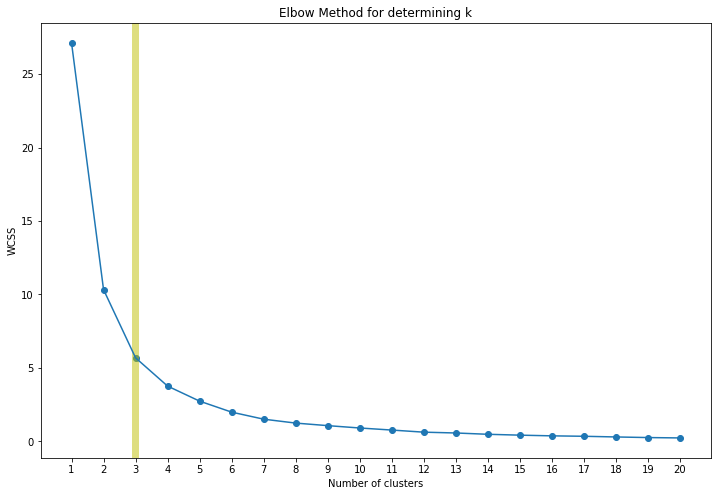

In [19]:
plt.figure(figsize=(12,8))
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for determining k')
plt.scatter(n_clusters,
            errors)
plt.plot(n_clusters,
         errors)
plt.xticks(n_clusters)
a = 2.9
b = 3.1
plt.axvspan(a, b, color='y', alpha=0.5, lw=0)
plt.show()

In [20]:
km = KMeans(n_clusters=3, verbose=0)
print("Clustering sparse data with %s" % km)
#t0 = time()
km.fit(X)
#print("d

Clustering sparse data with KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [21]:
km.labels_

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

In [22]:
# add cluster labels 1, 2 and 3
ct_df['km_cluster'] = km.labels_ + 1
# we'll use these to select clusters
km_mask_1 = ct_df['km_cluster']==1
km_mask_2 = ct_df['km_cluster']==2
km_mask_3 = ct_df['km_cluster']==3

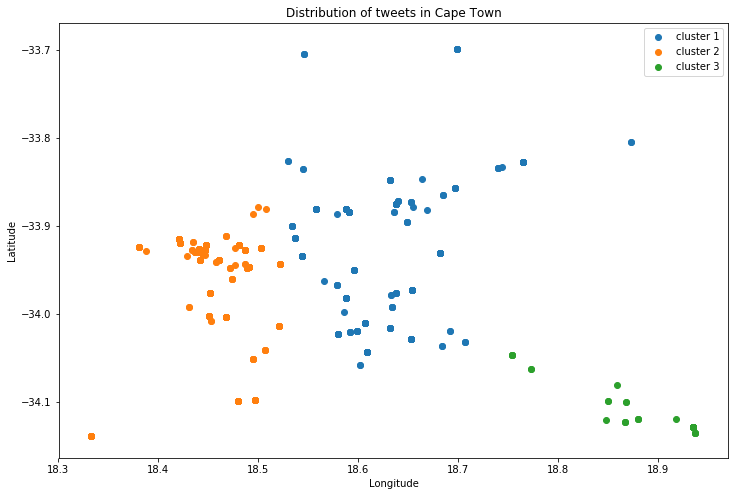

In [23]:
plt.figure(figsize=(12,8))
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Distribution of tweets in Cape Town')
cluster_label = 1
for mask in [km_mask_1, km_mask_2, km_mask_3]:
    df = ct_df[mask]
    plt.scatter(df['Longitude'], df['Latitude'], label='cluster '+str(cluster_label))
    cluster_label += 1
plt.legend()
plt.show()

# dbscan

In [26]:
data = ct_df.as_matrix(columns=['Latitude', 'Longitude'])

/Users/Ludwe/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [25]:
from __future__ import division
degrees = 10 / 100
db = DBSCAN(eps=degrees,
            min_samples=20)

In [27]:
db.fit(data)

# Add fitted label into DataFrame
ct_df['dbscan_cluster'] = db.labels_

# Find number of clusters created
clusters = ct_df.dbscan_cluster.unique()
print('{} unique clusters created'.format(str(len(clusters))))

3 unique clusters created


In [28]:
np.unique(db.labels_)

array([-1,  0,  1])

In [29]:
ct_df['dbscan_cluster'] = db.labels_ + 1
dbscan_1 = ct_df['dbscan_cluster']==0
dbscan_2 = ct_df['dbscan_cluster']==1
dbscan_3 = ct_df['dbscan_cluster']==2


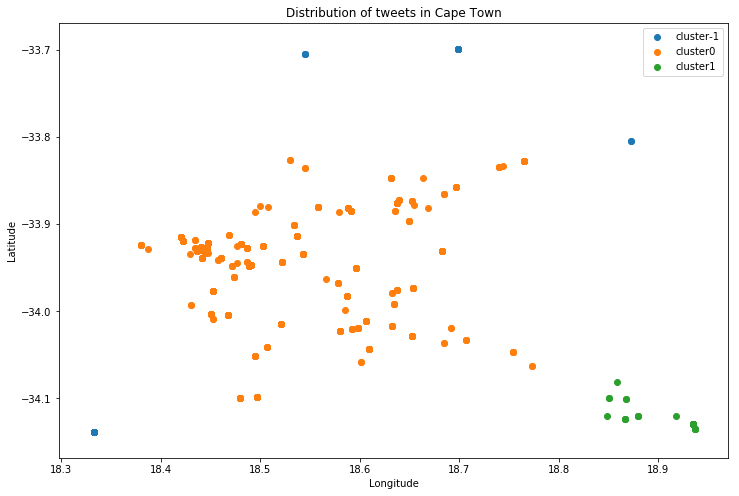

In [30]:
plt.figure(figsize=(12,8))
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Distribution of tweets in Cape Town')
cluster_label = -1
for mask in [dbscan_1, dbscan_2,dbscan_3]:
    df = ct_df[mask]
    plt.scatter(df['Longitude'], df['Latitude'], label='cluster'+str(cluster_label))
    cluster_label += 1
plt.legend()
plt.show()

In [31]:
ct_df['dbscan_cluster'].value_counts()

1    1430
2      48
0      22
Name: dbscan_cluster, dtype: int64

## MiniBatchKMeans

In [33]:
from sklearn.cluster import MiniBatchKMeans
import warnings

warnings.filterwarnings("ignore", category=DeprecationWarning)

In [34]:
mini_batch_50 = MiniBatchKMeans(n_clusters=3,
                                 init='k-means++',
                                 n_init=10,
                                 batch_size=100)
mini_batch_50.fit(data)

MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
        init_size=None, max_iter=100, max_no_improvement=10, n_clusters=3,
        n_init=10, random_state=None, reassignment_ratio=0.01, tol=0.0,
        verbose=0)

In [35]:
ct_df['mini_batch_50_cluster'] = mini_batch_50.labels_
ct_df['mini_batch_50_cluster'].value_counts()

0    1136
1     314
2      50
Name: mini_batch_50_cluster, dtype: int64

In [36]:
ct_df['mini_batch_50_cluster'] = db.labels_ + 1
mini_batch_1 = ct_df['mini_batch_50_cluster']==0
mini_batch_2 = ct_df['mini_batch_50_cluster']==1
mini_batch_3 = ct_df['mini_batch_50_cluster']==2

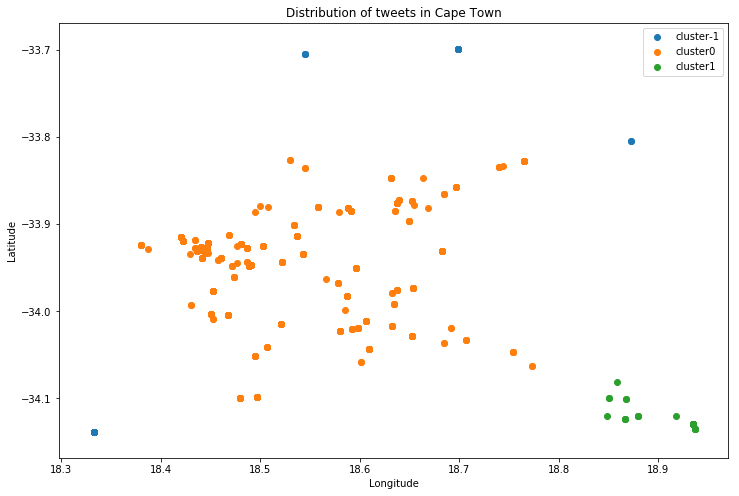

In [37]:
plt.figure(figsize=(12,8))
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Distribution of tweets in Cape Town')
cluster_label = -1
for mask in [mini_batch_1, mini_batch_2, mini_batch_3]:
    df = ct_df[mask]
    plt.scatter(df['Longitude'], df['Latitude'], label='cluster'+str(cluster_label))
    cluster_label += 1
plt.legend()
plt.show()

# Clustering tweets

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
stopwords = nltk.corpus.stopwords.words('english')
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")

In [39]:
def tokenize_and_stem(text):
    
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems


def tokenize_only(text):
    
    tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    return filtered_tokens

In [40]:
totalvocab_stemmed = []
totalvocab_tokenized = []
for i in ct_df['clean_tweet']:
    allwords_stemmed = tokenize_and_stem(i)
    totalvocab_stemmed.extend(allwords_stemmed)
    
    allwords_tokenized = tokenize_only(i)
    totalvocab_tokenized.extend(allwords_tokenized)

In [41]:
vocab_frame = pd.DataFrame({'words': totalvocab_tokenized}, index = totalvocab_stemmed)
vocab_frame 

,words
n2,n2
macassar,macassar
lane,lane
closur,closure
no,no
delay,delays
m5,m5
north,north
koeberg,koeberg
i/c,i/c


In [42]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.9, max_features=20000,
                                 min_df=0.05, stop_words='english',
                                 use_idf=True, tokenizer= tokenize_and_stem, ngram_range=(1,2))

tfidf_matrix = tfidf_vectorizer.fit_transform(ct_df['clean_tweet'])

print(tfidf_matrix.shape)

(1500, 48)


In [43]:
count_vectorizer = CountVectorizer(max_df=0.9, max_features=20000,
                                 min_df=0.05, stop_words='english',
                                tokenizer= tokenize_and_stem, ngram_range=(1,2))
count_matrix = count_vectorizer.fit_transform(ct_df['clean_tweet'])

print(count_matrix.shape)
terms_count = count_vectorizer.get_feature_names()
terms_count

(1500, 48)


['clear',
 'clear seeandbeseen',
 'close',
 'close delay',
 'close expect',
 'closur',
 'congest',
 'congest n1',
 'crash',
 'crash n1',
 'crash n2',
 'delay',
 'delay seeandbeseen',
 'durban',
 'expect',
 'expect delay',
 'i/c',
 'lane',
 'lane close',
 'lane closur',
 'lane open',
 'left',
 'left lane',
 'm5',
 'n1',
 'n1 ramp',
 'n2',
 'n2 ramp',
 'n7',
 'northbound',
 'old',
 'open',
 'open delay',
 'r300',
 'ramp',
 'rd',
 'right',
 'right lane',
 'road',
 'seeandbeseen',
 'south',
 'southbound',
 'stationari',
 'stationari vehicl',
 'stationary_vehicl',
 'traffic',
 'vehicl',
 'vehicl n2']

In [44]:
terms = tfidf_vectorizer.get_feature_names()
terms

['clear',
 'clear seeandbeseen',
 'close',
 'close delay',
 'close expect',
 'closur',
 'congest',
 'congest n1',
 'crash',
 'crash n1',
 'crash n2',
 'delay',
 'delay seeandbeseen',
 'durban',
 'expect',
 'expect delay',
 'i/c',
 'lane',
 'lane close',
 'lane closur',
 'lane open',
 'left',
 'left lane',
 'm5',
 'n1',
 'n1 ramp',
 'n2',
 'n2 ramp',
 'n7',
 'northbound',
 'old',
 'open',
 'open delay',
 'r300',
 'ramp',
 'rd',
 'right',
 'right lane',
 'road',
 'seeandbeseen',
 'south',
 'southbound',
 'stationari',
 'stationari vehicl',
 'stationary_vehicl',
 'traffic',
 'vehicl',
 'vehicl n2']

In [45]:
from sklearn.cluster import KMeans

num_clusters = 5

km = KMeans(n_clusters=num_clusters)

km.fit(tfidf_matrix)

clusters = km.labels_.tolist()

In [46]:
ct_df['k_cluster'] = km.labels_
ct_df['k_cluster'].value_counts()

1    646
2    299
0    245
3    183
4    127
Name: k_cluster, dtype: int64

In [47]:
from __future__ import print_function

print("Top terms per cluster:")
print()
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
for i in range(num_clusters):
    print("Cluster %d words:" % i, end='')
    for ind in order_centroids[i, :5]:
        print(' %s' % vocab_frame.ix[terms[ind].split(' ')].values.tolist()[0][0].encode('utf-8', 'ignore'), end=',')
    print()
    print()
  

Top terms per cluster:

Cluster 0 words: b'lane', b'open', b'open', b'lane', b'delays',

Cluster 1 words: b'cleared', b'n2', b'congestion', b'cleared', b'seeandbeseen',

Cluster 2 words: b'closed', b'lane', b'closed', b'lane', b'right',

Cluster 3 words: b'vehicle', b'stationary', b'stationary', b'vehicle', b'cleared',

Cluster 4 words: b'closure', b'lane', b'lane', b'road', b'delays',



In [48]:
cluster_colors = {0: '#1b9e77', 1: '#d95f02', 2: '#7570b3', 3: '#e7298a', 4: '#66a61e'}

cluster_names = {0: 'Cluster 1: Updates', 
                 1: 'Cluster 2: Congestion/Road Closure', 
                 2: 'Cluster 3: Stationary Vehicle', 
                 3: 'Cluster 4: Roadworks', 
                 4: 'Cluster 5: Crashes'}

In [49]:
from sklearn.metrics.pairwise import cosine_similarity
dist = 1 - cosine_similarity(tfidf_matrix)

In [50]:
import os  # for os.path.basename

import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn.manifold import MDS

MDS()

mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)
pos = mds.fit_transform(dist) 
xs, ys = pos[:, 0], pos[:, 1]

/Users/Ludwe/anaconda/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/Ludwe/anaconda/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/Ludwe/anaconda/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/Ludwe/anaconda/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on'

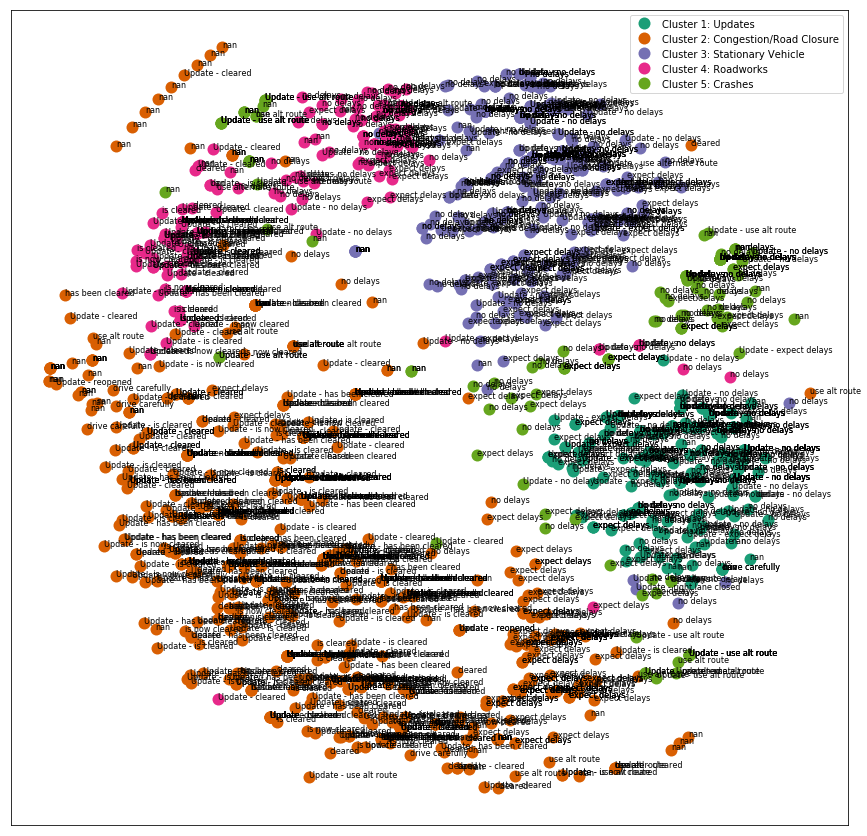

In [51]:

df = pd.DataFrame(dict(x=xs, y=ys, label=clusters,title = ct_df['Implication'])) 

groups = df.groupby('label')


fig, ax = plt.subplots(figsize=(15, 15)) 
ax.margins(0.05) 


for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, label=cluster_names[name], color=cluster_colors[name], mec='none')
    ax.set_aspect('auto')
    ax.tick_params(\
        axis= 'x',          
        which='both',      
        bottom='off',      
        top='off',         
        labelbottom='off')
    ax.tick_params(\
        axis= 'y',         
        which='both',     
        left='off',      
        top='off',         
        labelleft='off')
    
ax.legend(numpoints=1)  


for i in range(len(df)):
    ax.text(df.ix[i]['x'], df.ix[i]['y'], df.ix[i]['title'], size=8)  

    
    
plt.show()


#plt.savefig('clusters_slides_2.png', dpi=200)

/Users/Ludwe/anaconda/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/Ludwe/anaconda/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/Ludwe/anaconda/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/Ludwe/anaconda/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on'

KeyError: 'title'

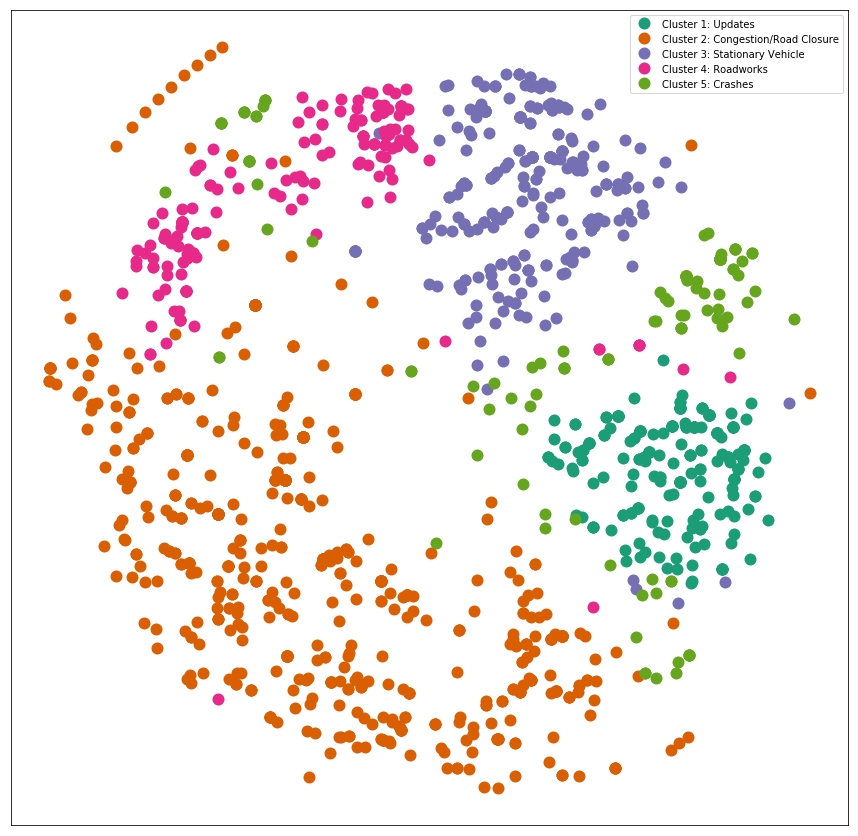

In [52]:

df = pd.DataFrame(dict(x=xs, y=ys, label=clusters)) 

groups = df.groupby('label')


fig, ax = plt.subplots(figsize=(15, 15)) 
ax.margins(0.05) 


for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, label=cluster_names[name], color=cluster_colors[name], mec='none')
    ax.set_aspect('auto')
    ax.tick_params(\
        axis= 'x',          
        which='both',      
        bottom='off',      
        top='off',         
        labelbottom='off')
    ax.tick_params(\
        axis= 'y',         
        which='both',     
        left='off',      
        top='off',         
        labelleft='off')
    
ax.legend(numpoints=1)  


for i in range(len(df)):
    ax.text(df.ix[i]['x'], df.ix[i]['y'], df.ix[i]['title'], size=8)  

    
    
plt.show()


#plt.savefig('clusters_slides_2.png', dpi=200)

In [53]:
ct_df.head()

,created_at,id_str,text,tweet_longitude,tweet_latitude,Update,Prob. Classification,Implication,finalAddress,Latitude,Longitude,created_at_old,clean_tweet,datetime,day,time,km_cluster,dbscan_cluster,mini_batch_50_cluster,k_cluster
0,2018-07-31 22:45:51,1.020000e+18,Update #Roadworks: N2 Outbound before Macassar...,NaN,NaN,Not Update,Roadworks,no delays,"nan, CapeTown, South Africa",-33.91909,18.42199,Tue Jul 31 22:45:51 2018,n2 macassar lane closure no delays,2018-07-31 22:45:51,Tuesday,22.750000,2,1,1,4
1,2018-07-31 22:31:35,1.020000e+18,"Update,Roadworks: M5 North @ Koeberg I/C, All ...",NaN,NaN,Not Update,Roadworks,no delays,"M5 Koeberg, CapeTown, South Africa",-34.09917,18.48012,Tue Jul 31 22:31:35 2018,m5 north koeberg i/c all lanes open no delays,2018-07-31 22:31:35,Tuesday,22.516667,2,1,1,0
2,2018-07-31 21:25:06,1.020000e+18,"Update,135277: N2 Inbound at Ramp to Mowbray M...",NaN,NaN,Not Update,NaN,is now cleared,"N2 Mowbray Main, CapeTown, South Africa",-33.94757,18.48903,Tue Jul 31 21:25:06 2018,135277 n2 at ramp to mowbray main ramp lane i...,2018-07-31 21:25:06,Tuesday,21.416667,2,1,1,1
3,2018-07-31 21:17:10,1.020000e+18,"135277: N2 Inbound at Ramp to Mowbray Main, ra...",-33.944567,18.473015,Not Update,NaN,no delays,"N2 Mowbray Main, CapeTown, South Africa",-33.94757,18.48903,Tue Jul 31 21:17:10 2018,135277 n2 at ramp to mowbray main ramp lane o...,2018-07-31 21:17:10,Tuesday,21.283333,2,1,1,1
4,2018-07-31 20:56:08,1.020000e+18,"Roadworks: M5 North @ Koeberg I/C, Right lane ...",NaN,NaN,Not Update,Roadworks,no delays,"M5 Koeberg, CapeTown, South Africa",-34.09917,18.48012,Tue Jul 31 20:56:08 2018,m5 north koeberg i/c right lane closed no de...,2018-07-31 20:56:08,Tuesday,20.933333,2,1,1,2
